In [ ]:
import os
import matplotlib.pyplot as plt
import time
directory = 'Tests\\set\\'

files = os.listdir(directory)

In [ ]:
k = 8
w = 3
q = 703

In [ ]:
from models.algorithms.winnowing import get_fingerprints
import time

In [ ]:
def check(count):
    count_files = int(len(files) * count)
    start_time = time.time()
    for i in range(count_files):
        for j in range(count_files):
            if i != j:
                print('File1: {0} File2: {1}'.format(files[i],files[j]))
                result = get_fingerprints(directory + files[i], directory + files[j],k,q,w)
                print('Plag: {}'.format(result[2]))
    end_time = time.time()
    res_time = end_time - start_time
    print('Time: {}'.format(res_time))
    return res_time

In [ ]:
count = [0.1,0.2,0.4,0.5,0.6,0.8,0.9,1]

In [ ]:
x = []
y = []
for i in count:
    count_files = int(len(files) * i)
    x.append(count_files)
    y.append(check(i))
    

In [ ]:
plt.title("Алгоритм отпечатков") # заголовок
plt.xlabel("Количество файлов") # ось абсцисс
plt.ylabel("Время") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, y)  # построение графикаplt.plot(x,y)

In [ ]:
from strsimpy.normalized_levenshtein import NormalizedLevenshtein
from models.preprocessing.cleantext import *
from strsimpy.cosine import Cosine

In [ ]:
def check_leven(count):
    count_files = int(len(files) * count)
    cosine = Cosine(5)
    start_time = time.time()
    for i in range(count_files):
        for j in range(count_files):
            if i != j:
                print('File1: {0} File2: {1}'.format(files[i],files[j]))
                
                text1 = toText(tokenize(directory + files[i]))
                text2 = toText(tokenize(directory + files[j]))
                #norm_levenshtein = NormalizedLevenshtein()
                p0 = cosine.get_profile(text1)
                p1 = cosine.get_profile(text2)
                result = cosine.similarity_profiles(p0,p1)#norm_levenshtein.similarity(text1, text2)
                print('Plag: {}'.format(result))
    end_time = time.time()
    res_time = end_time - start_time
    print('Time: {}'.format(res_time))
    return res_time

In [ ]:
count = [0.1,0.2,0.4,0.5,0.6,0.8,0.9,1]
x = []
y = []
for i in count:
    count_files = int(len(files) * i)
    x.append(count_files)
    y.append(check_leven(i))
    

In [ ]:
plt.title("Косинусное расстояние") # заголовок
plt.xlabel("Количество файлов") # ось абсцисс
plt.ylabel("Время") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, y)  # построение графикаplt.plot(x,y)

In [ ]:
from ast_git import get_clones

In [ ]:
start = time.time()
get_clones([directory + file for file in files])
end = time.time()
print('Time: {}'.format(end-start))

In [ ]:
def check_tree(count):
    count_files = int(len(files) * count)
    start_time = time.time()
    for i in range(count_files):
        for j in range(count_files):
            if i != j:
                get_clones([directory+files[i],directory+files[j]])
    end_time = time.time()
    res_time = end_time - start_time
    print('Time: {}'.format(res_time))
    return res_time

In [ ]:
count = [0.1,0.2,0.4,0.5,0.6,0.8,0.9,1]
x = []
y = []
for i in count:
    count_files = int(len(files) * i)
    x.append(count_files)
    y.append(check_tree(i))

In [ ]:
plt.title("AST") # заголовок
plt.xlabel("Количество файлов") # ось абсцисс
plt.ylabel("Время") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, y)  # построение графикаplt.plot(x,y)

In [17]:
import os
import matplotlib.pyplot as plt
import time
directory = 'Tests\\set\\'

files = os.listdir(directory)
from ast_git import get_clones, get_plag_combination

In [23]:
def check_comb(count):
    count_files = int(len(files) * count)
    start_time = time.time()
    res = []
    for i in range(count_files):
        for j in range(count_files):
            if i != j:
                res.append(get_plag_combination(directory+files[i],directory+files[j], 8, 277, 5, 5, 703, 3))
    end_time = time.time()
    res_time = end_time - start_time
    return res

In [24]:
count = [0.1,0.2,0.4,0.5,0.6,0.8,0.9,1]

x = [i for i in range(len(files))]
y = check_comb(0.7)

In [25]:
y1 = []
y2 = []
y3 = []
for i in y:
    if i != None:
        y1.append(i[0])
        y2.append(i[1])
        y3.append((i[1]+i[0])/2)
x = [i for i in range(len(y1))]

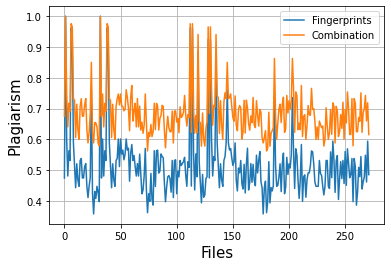

In [26]:
plt.plot(x, y1, label='Fingerprints')
plt.legend()
plt.plot(x, y2, label='Combination')
plt.legend()
#plt.plot(x, y3, '--',label='Average')
#plt.legend()
plt.xlabel('Files', fontsize=15)
plt.ylabel('Plagiarism', fontsize=15)
plt.grid(True)

In [27]:
z = []
for i in range(len(y1)):
    z.append(y2[i]-y1[i])
res = sum(z) / len(z)
res

0.16886876599945652